<a href="https://colab.research.google.com/github/jay-dit/NM_LFAK/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

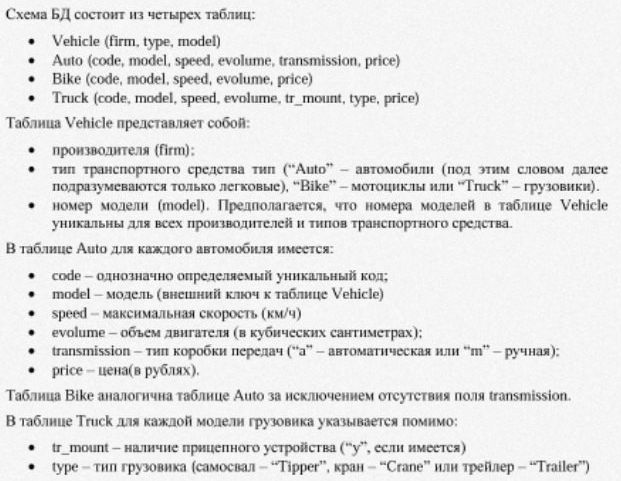

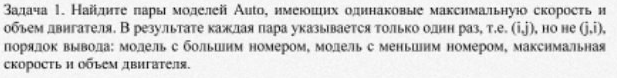

In [ ]:
SELECT
    at1.model "модель с большим номером", at2.model "модель с меньшим номером", 
    at1.speed "макс. скорость", at1.evolume "объем двигателя"
FROM Auto at1
     JOIN Auto at2
     ON at1.speed = at2.speed
     AND at1.evolume = at2.evolume
     AND at1.model > at2.model

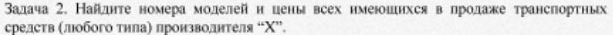

In [ ]:
SELECT data.* FROM 
(
    SELECT 
        v.model "номер модели", 
        a.price "стоимость"
    FROM Vehicle v
    join Auto a on v.model = a.model
    UNION
    SELECT 
        v.model "номер модели", 
        b.price "стоимость"
    FROM Vehicle v
    join Bike b on v.model = b.model
    UNION
    SELECT 
        v.model "номер модели", 
        t.price "стоимость"
    FROM Vehicle v
    join Truck t on v.model = t.model
) data 
JOIN Vehicle v ON data."номер модели" = v.model
WHERE v.firm = 'X'
ORDER BY data."номер модели"

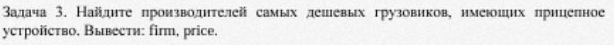

In [ ]:
-- сначала требуется запустить скрипт на создание вью
CREATE VIEW AVG_TRUCK_PRICES AS
SELECT firm, AVG(price) avgprice FROM (
    SELECT v.firm, t.price
    FROM Vehicle v
    JOIN Truck t 
    ON t.model = v.model
    WHERE t.tr_mount = 'y'
) GROUP BY firm 


-- выводим производителей у которых средняя стоимость грузовиков
-- не превышает среднего по всем другим средним
SELECT firm "Производитель", avgprice "Средняя стоимость грузовиков" 
FROM AVG_TRUCK_PRICES atp 
WHERE atp.avgprice <= (SELECT AVG(atp.avgprice) FROM AVG_TRUCK_PRICES atp)

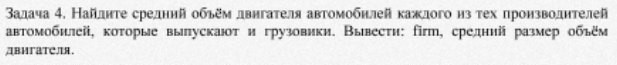

In [ ]:
SELECT v.firm "Производитель", a.evolume "Объем двигателя"
FROM Vehicle v
JOIN Auto a 
ON v.model = a.model
WHERE v.firm IN (
  SELECT v.firm 
  FROM Vehicle v 
  INNER JOIN Truck t 
  ON v.model = t.model
)

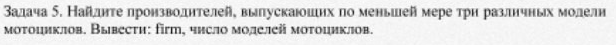

In [ ]:
SELECT firm "Производитель", cnt_m "Кол-во мотоциклов" FROM (
    SELECT v.firm, COUNT(b.model) cnt_m
    FROM Vehicle v
    JOIN Bike b ON v.model = b.model
    GROUP BY v.firm
) WHERE cnt_m >= 3